# __`Diabeter Prediction`__

In [360]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [361]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [362]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [363]:
# Independent and dependent features

X = df
y = dataset['target']

In [364]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

X_train.shape, X_test.shape

((309, 10), (133, 10))

In [365]:
## Correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


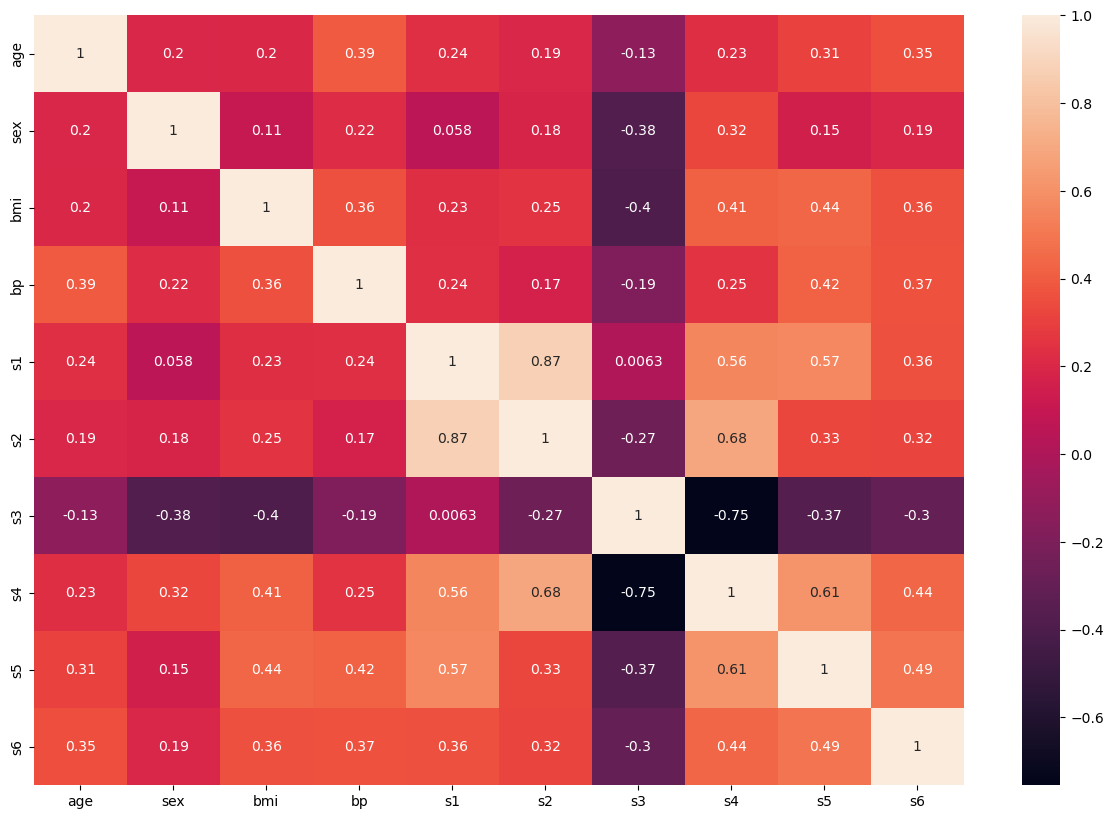

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (15, 10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [367]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [368]:
y_pred = regressor.predict(X_test)

In [369]:
## check for overfitting and r2_score
from sklearn.metrics import r2_score

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))
print(r2_score(y_test, y_pred))

1.0
-0.1849493774574138
-0.1849493774574138


## __`Post Pruning`__

In [370]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(len(ccp_alphas))
ccp_alphas

282


array([0.00000000e+00, 1.61812298e-03, 1.61812298e-03, 1.61812298e-03,
       1.61812298e-03, 1.61812298e-03, 1.61812298e-03, 1.61812298e-03,
       1.61812298e-03, 1.61812298e-03, 1.61812298e-03, 1.61812298e-03,
       1.61812298e-03, 2.15749730e-03, 2.15749730e-03, 2.15749730e-03,
       4.31499461e-03, 4.85436893e-03, 4.85436893e-03, 6.47249191e-03,
       6.47249191e-03, 6.47249191e-03, 6.47249191e-03, 6.47249191e-03,
       6.47249191e-03, 6.47249191e-03, 6.47249191e-03, 6.47249191e-03,
       8.62998921e-03, 8.62998921e-03, 1.32146710e-02, 1.45631068e-02,
       1.45631068e-02, 1.45631068e-02, 2.42718447e-02, 2.58899676e-02,
       2.58899676e-02, 2.58899676e-02, 2.58899676e-02, 2.58899676e-02,
       2.64293420e-02, 3.45199569e-02, 4.04530744e-02, 4.04530744e-02,
       4.04530744e-02, 4.04530744e-02, 4.04530744e-02, 4.04530744e-02,
       4.04530744e-02, 4.04530744e-02, 4.04530744e-02, 5.39374326e-02,
       5.82524272e-02, 5.82524272e-02, 5.82524272e-02, 5.82524272e-02,
      

In [371]:
reg = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state = 42, ccp_alpha = alpha)
    model.fit(X_train, y_train)
    reg.append(model)

print(len(reg))

282


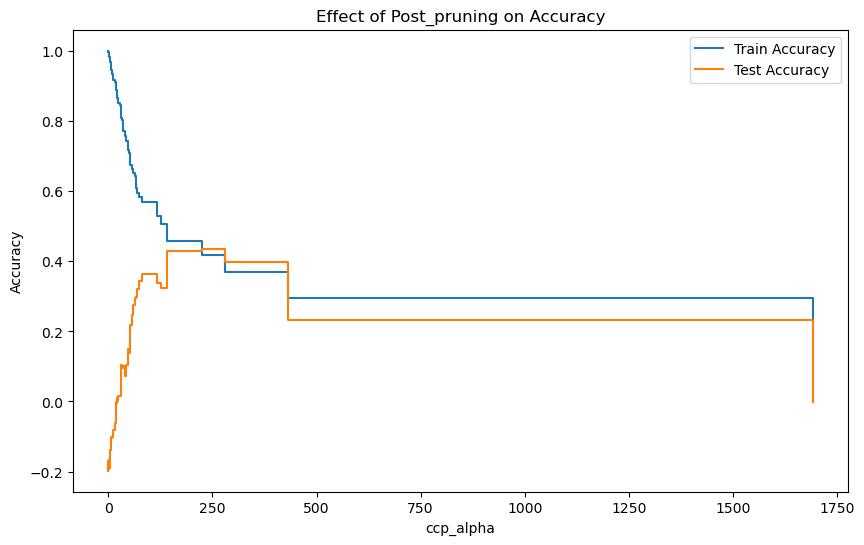

In [372]:
train_score = [model.score(X_train, y_train) for model in reg]
test_score = [model.score(X_test, y_test) for model in reg]

plt.figure(figsize = (10, 6))
plt.plot(ccp_alphas, train_score, label = 'Train Accuracy', drawstyle = 'steps-post')
plt.plot(ccp_alphas, test_score, label = 'Test Accuracy', drawstyle = 'steps-post')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Effect of Post_pruning on Accuracy')
plt.legend()
plt.show()

In [373]:
import numpy as np
best_model = reg[np.argmax(test_score)]
print("Best ccp_alpha :", best_model.ccp_alpha)
print("Best Train Accuracy :", best_model.score(X_train, y_train))
print("Best Test Accuracy :", best_model.score(X_test, y_test))

Best ccp_alpha : 224.95966490217972
Best Train Accuracy : 0.4175404625247783
Best Test Accuracy : 0.4353657531189933


In [374]:
final_reg = DecisionTreeRegressor(random_state = 42, ccp_alpha = 224.9597)
final_reg.fit(X_train, y_train)

y_pred = final_reg.predict(X_test)

print("Train Accuracy:", final_reg.score(X_train, y_train))
print("Test Accuracy:", final_reg.score(X_test, y_test))
print(r2_score(y_test, y_pred))

Train Accuracy: 0.4175404625247783
Test Accuracy: 0.4353657531189933
0.4353657531189933


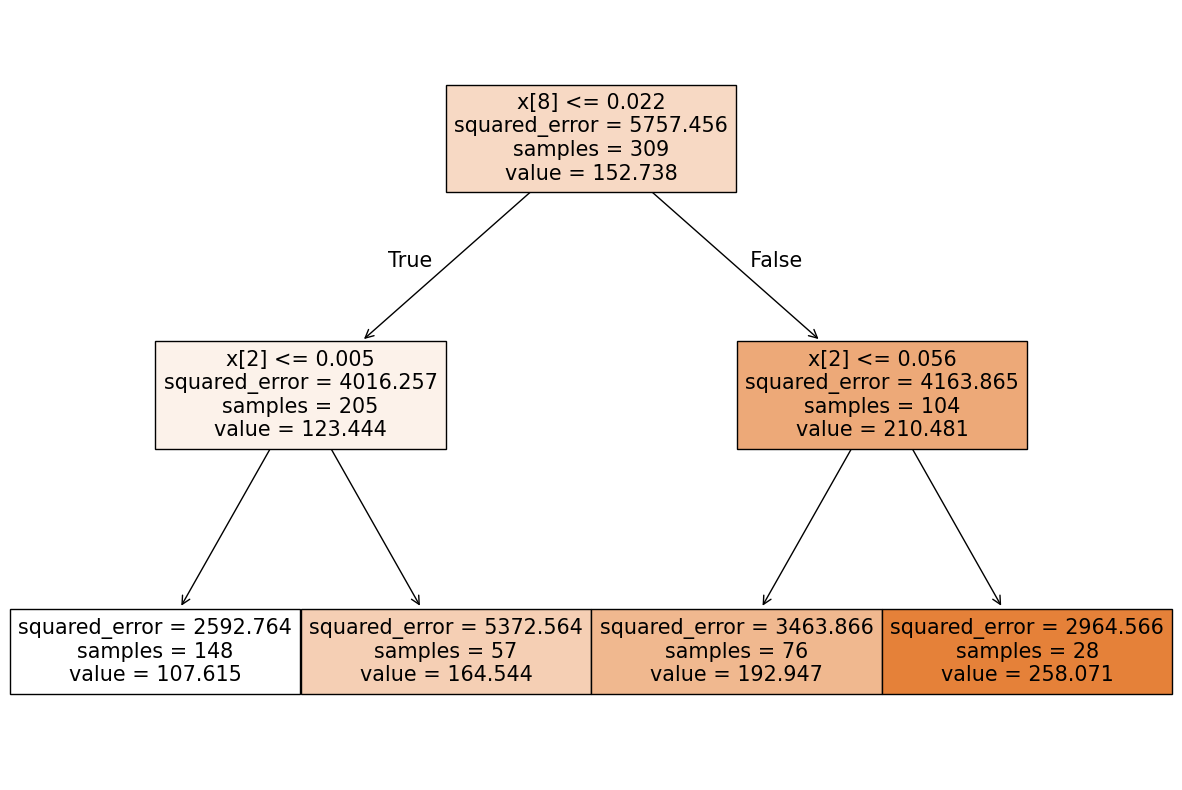

In [375]:
## visulaize the tree

from sklearn import tree
plt.figure(figsize = (15, 10))

tree.plot_tree(final_reg, filled = True)
plt.show()

## __`Pre Pruning`__

In [376]:
from sklearn.model_selection import GridSearchCV

DecisionTreeRegressor()

criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [2, 3, 4, 5, None] 
max_features = ['auto', 'sqrt', 'log2']
min_samples_leaf = [1, 2, 4, 6]
max_leaf_nodes = [None, 5, 10, 15] 
min_samples_split = [2, 5, 10]

params = dict(criterion = criterion, splitter = splitter, max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf, max_leaf_nodes = max_leaf_nodes, min_samples_split = min_samples_split)

params

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 3, 4, 5, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4, 6],
 'max_leaf_nodes': [None, 5, 10, 15],
 'min_samples_split': [2, 5, 10]}

In [377]:
grid = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = params, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 3)

import warnings
warnings.filterwarnings('ignore')

grid.fit(X_train, y_train)

Fitting 10 folds for each of 5760 candidates, totalling 57600 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [378]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'splitter': 'best'}

In [379]:
grid.best_score_

-3623.264139784946

In [380]:
## predictions
y_pred=grid.predict(X_test)

In [381]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.2786974314897428
55.3984962406015
4564.165413533835


In [382]:
final_model = DecisionTreeRegressor(criterion= 'poisson',
                    max_depth= 5,
                    max_features= 'log2',
                    max_leaf_nodes= 15,
                    min_samples_leaf= 4,
                    min_samples_split= 10,
                    splitter= 'best')

final_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='log2',
                      max_leaf_nodes=15, min_samples_leaf=4,
                      min_samples_split=10)

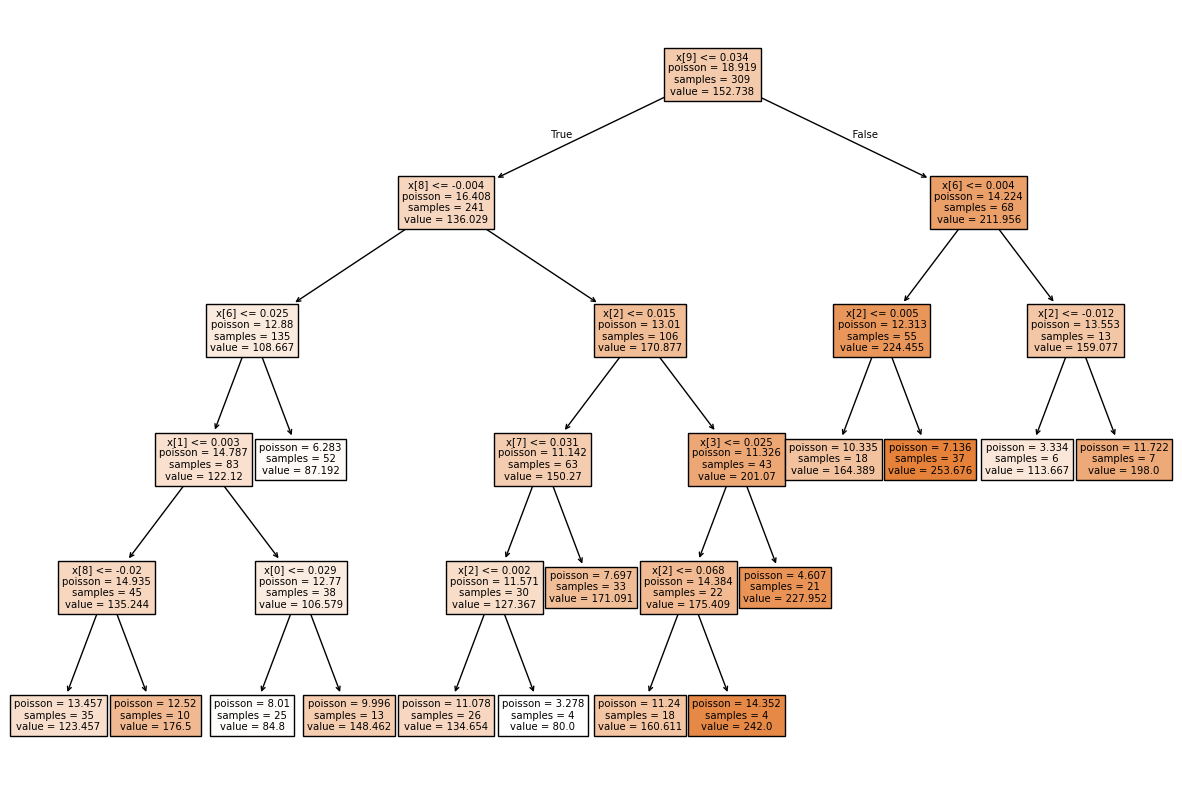

In [383]:
## Visualization the decision tree

from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(final_model, filled = True)
plt.show()